# Building a Logistic Regression

### Create a logistic regression based on the bank data provided.
### The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
### Note that the first column of the dataset is the index.

# Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
df=pd.read_csv("C:/Users/Bagavathi Priya/Downloads/Example_bank_data.csv")

In [3]:
df.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


# Data cleaning

**As the first column is index as mentioned in description, we can remove that as they don't add any value to the model**

In [5]:
df.columns

Index(['Unnamed: 0', 'duration', 'y'], dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   duration  518 non-null    int64 
 1   y         518 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


**As the y variable is of object type we have to convert that to numerical values**

In [28]:
df.isnull().sum()

duration    0
y           0
dtype: int64

In [9]:
num={'y':{'yes':1,'no':0}}

In [10]:
df.replace(num,inplace=True)
df.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [11]:
df['y'].unique()

array([0, 1], dtype=int64)

**Successfully converted yes or no data to 0's & 1's**

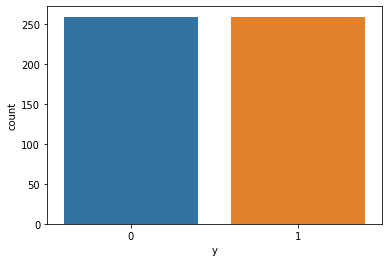

In [19]:
import seaborn as sns
sns.countplot(df['y'])
#plt.legend()

**Both the types of value have same no of records**

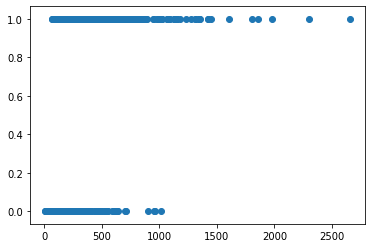

In [22]:
plt.scatter(df['duration'],df['y'])

**The plot clearly says that linear regression will not be useful, and it denotes the structure of logistic regression**

# Dependent (y) & Independent (x) variables

In [12]:
x=df[['duration']
y=df['y']

In [14]:
df.shape

(518, 2)

# Train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Logistic regression

In [23]:
import statsmodels.api as sm

In [29]:
log_reg=sm.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.639780
         Iterations 5


In [30]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      413
Method:                           MLE   Df Model:                            0
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                 0.07643
Time:                        21:30:58   Log-Likelihood:                -264.87
converged:                       True   LL-Null:                       -286.79
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0015      0.000      6.000      0.000       0.001       0.002
==============================================================================
"""

# Prediction on new data

In [32]:
ypred=log_reg.predict(166)
ypred.argmax()

0

# Accuracy

In [49]:
yhat=log_reg.predict(xtest)
yhat=list(map(round,yhat))

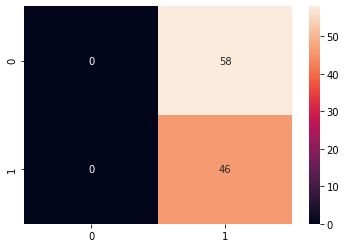

In [51]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ytest,yhat),annot=True)

In [53]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(yhat,ytest)*100

In [54]:
acc

44.230769230769226

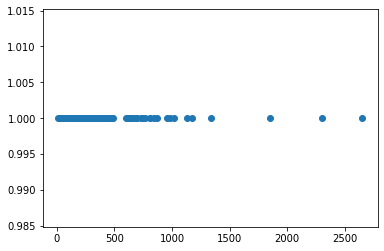

In [55]:
plt.scatter(xtest,yhat)

# Using sklearn

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
sk_log=LogisticRegression()

In [65]:
x=df[['duration']]
y=df[['y']]

In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [69]:
sk_log.fit(xtrain,ytrain)

E:\Installed\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
yhat=sk_log.predict(xtest)
acc=accuracy_score(yhat,ytest)*100
acc

73.07692307692307

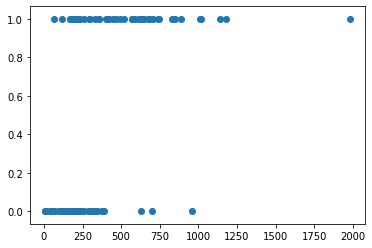

In [71]:
plt.scatter(xtest,ytest)